# Introduction to Data Science

## Assignment 03

---

* Submitted By: **Muhammad Hasan Malik**


---


## Table Of Contents

**Assignment 02**
> Linear Regression  
> Logistic Regression

**Assignment 03**
> Principal Component Analysis (Feature Reduction)  
> Genetic Algorithm (Feature Extraction)

**Data - Chemicals**

Import Data

In [2]:
import pandas as pd

# use the pandas library to import csv file as a dataframe
df = pd.read_csv(r'/content/chemicals_data.csv')

Dataframe

In [3]:
# show the first 5 lines of the dataframe to see how the data looks like
df.head()

,molecule_id,pXC50,b0001,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,b0012,b0013,b0014,b0015,b0016,b0017,b0018,b0019,b0020,b0021,b0022,b0023,b0024,b0025,b0026,b0027,b0028,b0029,b0030,b0031,b0032,b0033,b0034,b0035,b0036,b0037,b0038,...,b0985,b0986,b0987,b0988,b0989,b0990,b0991,b0992,b0993,b0994,b0995,b0996,b0997,b0998,b0999,b1000,b1001,b1002,b1003,b1004,b1005,b1006,b1007,b1008,b1009,b1010,b1011,b1012,b1013,b1014,b1015,b1016,b1017,b1018,b1019,b1020,b1021,b1022,b1023,b1024
0,CHEMBL100013,5.000,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,CHEMBL100067,5.000,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,CHEMBL100109,9.620,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL100181,6.522,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL100187,7.796,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Remove the 'molecule_id' as it is neither a feature nor a class label

In [4]:
# delete the first column of the dataframe df
del df['molecule_id']

Extract the features from the dataframe

In [5]:
# extract features i.e. column b0001 to b1024
features = df.iloc[:,1:].fillna(0)

In [6]:
# features dataframe
features.head()

,b0001,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,b0012,b0013,b0014,b0015,b0016,b0017,b0018,b0019,b0020,b0021,b0022,b0023,b0024,b0025,b0026,b0027,b0028,b0029,b0030,b0031,b0032,b0033,b0034,b0035,b0036,b0037,b0038,b0039,b0040,...,b0985,b0986,b0987,b0988,b0989,b0990,b0991,b0992,b0993,b0994,b0995,b0996,b0997,b0998,b0999,b1000,b1001,b1002,b1003,b1004,b1005,b1006,b1007,b1008,b1009,b1010,b1011,b1012,b1013,b1014,b1015,b1016,b1017,b1018,b1019,b1020,b1021,b1022,b1023,b1024
0,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Extract the classes from the dataframe

In [7]:
# extract class labels
classes = df.iloc[:,0]

In [8]:
classes.head()

0    5.000
1    5.000
2    9.620
3    6.522
4    7.796
Name: pXC50, dtype: float64

**Data conversion**

In [93]:
import numpy as np

# convert data into numpy array

X = np.asarray(features)
y = np.asarray(classes)

In [10]:
X # array of features

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [11]:
y # array of labels

array([5.   , 5.   , 9.62 , ..., 8.097, 6.697, 7.538])

**Data Splitting**

In [94]:
from sklearn.model_selection import train_test_split

# split the data so that accuracy can be predicted
# training data is 80% of the data, while testing data is 20%
# random state just splits in the same manner if splitted again
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
                 test_size = 0.20,
                 random_state = 1
                 )

# **Regression**  

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features'). The most common form of regression analysis is linear regression.
Source: [Regression - Wikipedia](https://en.wikipedia.org/wiki/Regression_analysis)

### **Conventional Way for Linear Regression**  

The equation of line is `y=mx + b`, to find `m` and `b`, we use the the following formulas:   

* $$ m =  \frac{n \sum xy - (\sum x)(\sum y)}{n \sum (x^2) - (\sum x)^2}$$


* $$ b = \frac{\sum y }{n} - m \frac{\sum x}{n}$$


In [13]:
from sklearn.linear_model import LinearRegression

def get_linear_regression_model(x1, y1):
  '''
  Returns Linear Regression Model fitted with data
  '''

  # initialize the model
  model = LinearRegression()

  # pass the training data to fit into the model
  model.fit(x1, y1)

  # return the model fitted with data
  return model

In [14]:
model = get_linear_regression_model(X_train, y_train)

Test the model's accuracy

In [15]:
# check model's score by cross-refrencing it with training of test data
score = model.score(X_train, y_train)

print("Score: {}%".format(round(score, 1)*100))

Score: 80.0%


In [16]:
# make predictions from the test data
y_pred = model.predict(X_test)

Linear Regression Model's Metrics

In [95]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"The R_square of prediction of (RF): {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error: 2279121140.382344
Mean Squared Error: 2.1426759677360047e+21
Root Mean Squared Error: 46289048032.29382
The R_square of prediction of (RF): -9.276557971730939e+20


Metrics

In [96]:
# Add metrics into array for visualization

non_pca_metrics = []

non_pca_metrics.append(metrics.mean_absolute_error(y_test, y_pred))
non_pca_metrics.append(metrics.mean_squared_error(y_test, y_pred))
non_pca_metrics.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
non_pca_metrics.append(metrics.r2_score(y_test, y_pred))

# convert into a numpy array
non_pca_metrics = np.array(non_pca_metrics)

non_pca_metrics.shape

(4,)

### **Logistic Regression**

The logistic regression plots and S curve and is sued for binary classification

* $$ P = \frac{1}{1+e^{-y}}$$

In [ ]:
from sklearn.linear_model import LogisticRegression

def get_logistic_regression_model(x1, y1):
  '''
  Returns Logistic Regression Model fitted with data
  '''

  # initialize the model
  model = LogisticRegression()

  # pass the training data to fit into the model
  model.fit(x1, y1)

  # return the model fitted with data
  return model

Labels Encoding

In [38]:
from sklearn import preprocessing

# Encode labels so that labels can be fitted into the logistic regression model

# initialize encoder
encoder = preprocessing.LabelEncoder()

# encode the labels
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [39]:
from sklearn import utils

# print type of classes
print("Type of y_train: ", utils.multiclass.type_of_target(y_train))
print("Type of y_test: ", utils.multiclass.type_of_target(y_test))

Type of y_train:  multiclass
Type of y_test:  multiclass


In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
y_test.dtype

dtype('int64')

In [ ]:
logistic_model = get_logistic_regression_model(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# check logistic model's score by cross-refrencing it with training of test data
logistic_score = logistic_model.score(X_train, y_train)

print("Score: {}%".format(round(logistic_score, 1)*100))

Score: 90.0%


In [ ]:
from sklearn.metrics import accuracy_score

# check model's accuracy
y_predicted = logistic_model.predict(X_test)
accuracy_score(y_test, y_predicted)

0.001095290251916758

**Normalization of Data**

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# a new variable so that X_train doesn't get changed
X_train_new = X_train

# Normalize the data through Standard Scaler
sc = StandardScaler()
X_normalized = sc.fit_transform(X_train_new)

# Apply PCA on the data

# initialize for 2D PCA
pca = PCA(n_components = 2)
pca.fit(X_normalized)

# transform
pca_X = pca.transform(X_normalized)
pca_X.shape

(3651, 2)

## **Visualization**

2D Visualization

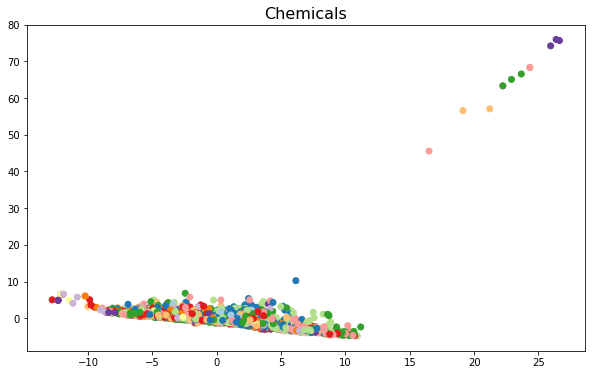

In [ ]:
from matplotlib import pyplot as plt

# initialize the figure
plt.figure(figsize=(10,6))

# title
plt.title('Chemicals', fontsize=16)

# plot scatter points
plt.scatter(pca_X[:,0], pca_X[:,1], c=y_train, cmap='Paired')

# plot the regression line
# plt.plot(X_test, y_pred)

plt.show()

Variance by PCA - 2D

In [ ]:
pca.explained_variance_ratio_

array([0.01778158, 0.01640308])

3D Visualization

In [ ]:
# Apply PCA on the data as 3D
pca3d = PCA(n_components = 3)
pca3d.fit(X_normalized)
pca_x_3d = pca3d.transform(X_normalized)

# Shape of data now
pca_x_3d.shape

(3651, 3)

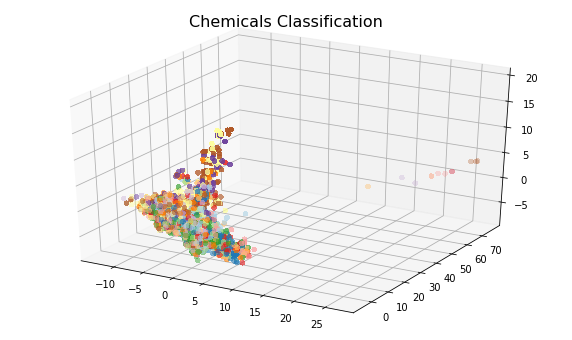

In [ ]:
from mpl_toolkits.mplot3d import axes3d

# initialize the figure
fig_3d = plt.figure(figsize=(10,6))
ax = fig_3d.add_subplot(111, projection='3d')

# initialize the points
x_points = pca_x_3d[:,0]
y_points = pca_x_3d[:,1]
z_points = pca_x_3d[:,2]

# figure title
plt.title('Chemicals Classification', fontsize = 16)

# plot the 3D graph
surf = ax.scatter3D(x_points, y_points, z_points, linewidth=0, antialiased=False, c=y_train, cmap='Paired')

plt.show()

Variance by PCA - 3D

In [ ]:
pca3d.explained_variance_ratio_

array([0.01778154, 0.01640323, 0.01401366])

## **Feature Reduction - Effect on Model**

In [98]:
# check the object type

pca_X.dtype

dtype('float64')

In [99]:
# reduced trianing data

pca_X_train = pca_X

Reducing Test Data

In [100]:
# a new variable so that X_test doesn't get changed
X_test_new = X_test

# Normalize the data through Standard Scaler
X_normalized_test = sc.fit_transform(X_test_new)

# initialize for 2D PCA
pca.fit(X_normalized_test)

# transform
pca_X_test = pca.transform(X_normalized_test)
pca_X_test.shape

(913, 2)

**Linear Regression - PCAed Data**

In [101]:
# get linear model fitted with the PCAed data

linear_model_pca = get_linear_regression_model(pca_X_train, y_train)

Check Model's Score

In [102]:
# obtain the model's score

linear_model_pca.score(pca_X_train, y_train)

0.03736365996189828

Predictions

In [103]:
# store the predictions of PCAed model

y_pred_pca = linear_model_pca.predict(pca_X_test)

Metrics

In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pca))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pca))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))
print(f"The R_square of prediction of (RF): {metrics.r2_score(y_test, y_pred_pca)}")

Mean Absolute Error: 1.2475624194574657
Mean Squared Error: 2.454532225635879
Root Mean Squared Error: 1.5666946816900473
The R_square of prediction of (RF): -0.06267166979297545


Metrics

In [105]:
# Add metrics into array for visualization

pca_metrics = []

pca_metrics.append(metrics.mean_absolute_error(y_test, y_pred_pca)*1e21)
pca_metrics.append(metrics.mean_squared_error(y_test, y_pred_pca)*1e21)
pca_metrics.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca))*1e21)
pca_metrics.append(metrics.r2_score(y_test, y_pred_pca)*1e21)

# convert into a numpy array
pca_metrics = np.array(pca_metrics)

pca_metrics.shape

(4,)

### **Comparison**

**Bar Chart**

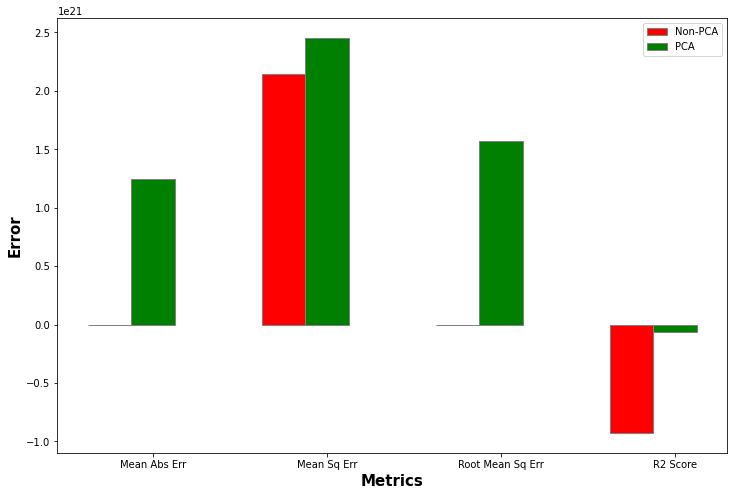

In [106]:
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
# non_pca_metrics
# pca_metrics

 
# Set position of bar on X axis
br1 = np.arange(len(non_pca_metrics))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, non_pca_metrics, color ='r', width = barWidth,
        edgecolor ='grey', label ='Non-PCA')
plt.bar(br2, pca_metrics, color ='g', width = barWidth,
        edgecolor ='grey', label ='PCA')
 
# Adding Labels
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Error', fontweight ='bold', fontsize = 15)

# Adding X-ticks
plt.xticks([r + barWidth for r in range(len(non_pca_metrics))],
        ['Mean Abs Err', 'Mean Sq Err', 'Root Mean Sq Err', 'R2 Score'])
 
plt.legend()
plt.show()

**Box Plot**

In [107]:
from sklearn import model_selection

# K-Fold
kfold = model_selection.KFold(n_splits=10)

# Store model's cross validation
cv_result1 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
cv_result2 = model_selection.cross_val_score(linear_model_pca, pca_X_test, y_test, cv=kfold)

# Make array of results
results = []
results.append(cv_result1)
results.append(cv_result2)

# Array of names
names = ['Non-PCA', 'PCA']

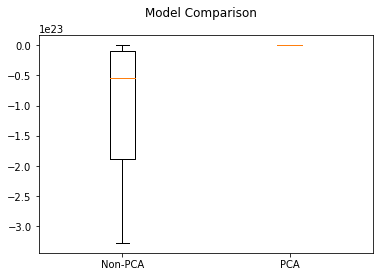

In [108]:
# Boxplot Model's Comparison

fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## **Genetic Algorithm**

In [109]:
!pip install sklearn-genetic

     |████████████████████████████████| 163kB 6.5MB/s 


In [113]:
from __future__ import print_function
import numpy as np
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV

# initialize the estimator
estimator = LinearRegression()

# initialize the selector
selector = GeneticSelectionCV(estimator,
                              cv=5,
                              verbose=1,
                              # scoring="accuracy",
                              max_features=5,
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=40,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)

selector = selector.fit(X_train, y_train)

print(selector.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                      	max                    
0  	50    	[0.01402505 3.04      ]	[0.02454688 1.32604676]	[-0.00276218  1.        ]	[0.11377394 5.        ]
1  	25    	[-1799.97016336     8.04      ]	[3841.88852169   13.70833323]	[-1.e+04  2.e+00]        	[ 0.11377394 64.        ]
2  	25    	[-2399.96083758    14.22      ]	[4270.85330831   20.80316322]	[-1.e+04  1.e+00]        	[ 0.11377394 61.        ]
3  	28    	[-2599.94985568    16.48      ]	[4386.37216302   22.7413632 ]	[-1.e+04  1.e+00]        	[ 0.15492096 79.        ]
4  	29    	[-2599.93036001    12.54      ]	[4386.38371906   18.17053659]	[-1.e+04  1.e+00]        	[ 0.15492096 64.        ]
5  	29    	[-3199.91881764    18.9       ]	[4664.81720659   22.81863274]	[-1.e+04  2.e+00]        	[ 0.15558277 65.        ]
6  	34    	[-3399.91225893    16.72      ]	[4737.15068832   20.73262164]	[-1.e+04  2.e+00]        	[ 0.15558277 60

Score

In [119]:
score = selector.score(X_train, y_train)
print('Training Score: ',score)

Training Score:  0.1645519272293492


In [120]:
score = selector.score(X_test, y_test)
print('Testing Score: ',score)

Testing Score:  0.13867517829770692


In [124]:
ftrs = selector.n_features_
print(f'No. of features: {ftrs}')

No. of features: 5


In [127]:
# Tranform the X_train having only 5 features selected by the GA

X_train = selector.fit_transform(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                      	max                    
0  	50    	[0.01213163 3.14      ]	[0.01907052 1.44235918]	[-0.00306766  1.        ]	[0.09284297 5.        ]
1  	25    	[-1399.97094404    10.3       ]	[3469.882038     17.99694419]	[-1.e+04  1.e+00]        	[ 0.09284297 70.        ]
2  	29    	[-2199.95628001    11.24      ]	[4142.48625459   18.32109167]	[-1.e+04  1.e+00]        	[ 0.10924567 66.        ]
3  	22    	[-1799.933588    11.82    ]    	[3841.90565797   18.03406776]	[-1.e+04  2.e+00]        	[ 0.10924567 62.        ]
4  	32    	[-3399.94354954    18.32      ]	[4737.12822977   21.99130737]	[-1.e+04  1.e+00]        	[ 0.10924567 71.        ]
5  	24    	[-2399.93021835    14.24      ]	[4270.87051476   20.37602513]	[-1.e+04  3.e+00]        	[ 0.10924567 88.        ]
6  	34    	[-3599.93921497    17.16      ]	[4800.04558881   21.83699613]	[-1.e+04  3.e+00]        	[ 0.11329542 81

In [129]:
X_train.shape

(3651, 5)

## **Genetic Algorithm - Effect on Model**

In [130]:
# get linear model fitted with the genetic algo modified data

linear_model_GA = get_linear_regression_model(X_train, y_train)

In [132]:
# Tranform the X_train having only 5 features selected by the GA

X_test = selector.fit_transform(X_test, y_test)

Selecting features with genetic algorithm.
gen	nevals	avg                              	std                    	min                    	max                    
0  	50    	[-1.83655102e-04  3.10000000e+00]	[0.01842595 1.36014705]	[-0.0212282  1.       ]	[0.08500102 5.        ]
1  	27    	[-1599.98717068     9.48      ]  	[3666.0661552    17.15137312]	[-10000.      0.]      	[ 0.08500102 62.        ]
2  	28    	[-1199.96453802     8.18      ]  	[3249.6284572    14.91936996]	[-1.e+04  1.e+00]      	[ 0.111349 66.      ]    
3  	34    	[-1999.95017663    10.98      ]  	[4000.02491181   18.43636624]	[-10000.      0.]      	[ 0.13041526 64.        ]
4  	33    	[-2799.93309929    15.08      ]  	[4490.03058412   20.76327527]	[-1.e+04  2.e+00]      	[ 0.13041526 68.        ]
5  	30    	[-2599.9145467    16.26     ]    	[4386.39309228   22.59275105]	[-1.e+04  1.e+00]      	[ 0.13739783 66.        ]
6  	30    	[-2399.90815709    13.34      ]  	[4270.8829121    19.07942347]	[-1.e+04  2.e+00]      

In [133]:
# Make predictions

y_pred_GA = linear_model_GA.predict(X_test)

In [134]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_GA))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_GA))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GA)))
print(f"The R_square of prediction of (RF): {metrics.r2_score(y_test, y_pred_GA)}")

Mean Absolute Error: 1.4059056822115654
Mean Squared Error: 3.113414972996175
Root Mean Squared Error: 1.764487169972107
The R_square of prediction of (RF): -0.3479301080494783


In [135]:
# Add metrics into array for visualization

ga_metrics = []

ga_metrics.append(metrics.mean_absolute_error(y_test, y_pred_GA)*1e21)
ga_metrics.append(metrics.mean_squared_error(y_test, y_pred_GA)*1e21)
ga_metrics.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_GA))*1e21)
ga_metrics.append(metrics.r2_score(y_test, y_pred_GA)*1e21)

# convert into a numpy array
ga_metrics = np.array(ga_metrics)

ga_metrics.shape

(4,)

**Bar Chart**

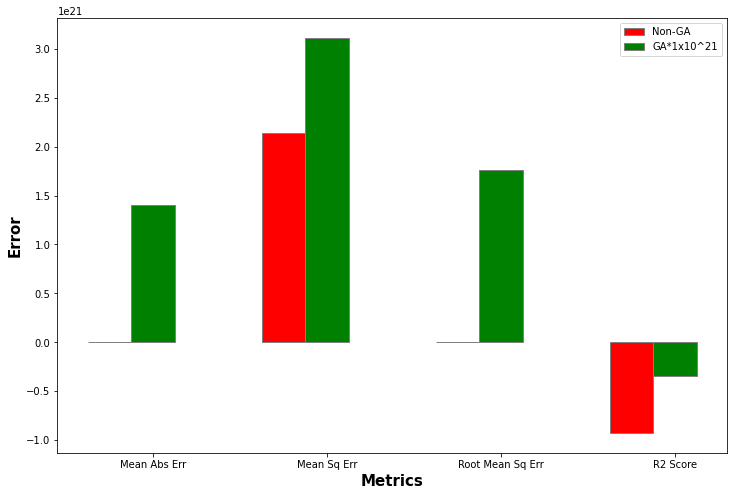

In [138]:
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
# non_pca_metrics
# ga_metrics

 
# Set position of bar on X axis
br1 = np.arange(len(non_pca_metrics))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, non_pca_metrics, color ='r', width = barWidth,
        edgecolor ='grey', label ='Non-GA')
plt.bar(br2, ga_metrics, color ='g', width = barWidth,
        edgecolor ='grey', label ='GA*1x10^21')
 
# Adding Labels
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Error', fontweight ='bold', fontsize = 15)

# Adding X-ticks
plt.xticks([r + barWidth for r in range(len(non_pca_metrics))],
        ['Mean Abs Err', 'Mean Sq Err', 'Root Mean Sq Err', 'R2 Score'])
 
plt.legend()
plt.show()

## **Overall Comparison**

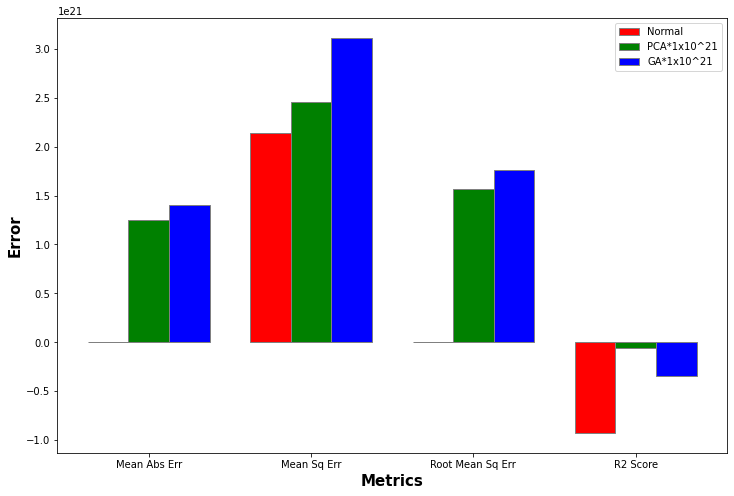

In [141]:
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
# normal_metrics
# pca_metrics
# ga_metrics

 
# Set position of bar on X axis
br1 = np.arange(len(non_pca_metrics))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, non_pca_metrics, color ='r', width = barWidth,
        edgecolor ='grey', label ='Normal')
plt.bar(br2, pca_metrics, color ='g', width = barWidth,
        edgecolor ='grey', label ='PCA*1x10^21')
plt.bar(br3, ga_metrics, color ='b', width = barWidth,
        edgecolor ='grey', label ='GA*1x10^21')
 
# Adding Labels
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Error', fontweight ='bold', fontsize = 15)

# Adding X-ticks
plt.xticks([r + barWidth for r in range(len(non_pca_metrics))],
        ['Mean Abs Err', 'Mean Sq Err', 'Root Mean Sq Err', 'R2 Score'])
 
plt.legend()
plt.show()

Hence, after the comparison, if features are extracted from `Genetic Algorithm`, and the `Linear Regression` is trnaformed, the model yeilds the best results.


---

